# Лабораторная работа 4.
# Распознавание цифр с использованием набора данных MNIST
(Python вариант)


In [55]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import numpy as np

import cv2
import torchvision.transforms as transforms


In [10]:
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=ToTensor(), download=True)

In [11]:
train_data, val_data = random_split(train_data, [50000, 10000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [12]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = F.softmax(self.fc2(x), dim=1)
    return x

In [21]:
def train_epoch(model, data_loader, optimizer, loss_fn):
  model.train()
  for X, Y in data_loader:
    optimizer.zero_grad()
    Y_pred = model(X)
    loss = loss_fn(Y_pred, Y)
    loss.backward()
    optimizer.step()

def evaluate_model(model, data_loader, loss_fn):
  model.eval()
  total_loss = 0
  with torch.no_grad():
    for X, Y in data_loader:
      Y_pred = model(X)
      loss = loss_fn(Y_pred, Y)
      total_loss += loss.item()
  return total_loss / len(data_loader)

def predict(model, loader):
  model.eval()
  all_preds = []
  with torch.no_grad():
    for X, _ in loader:
      preds = model(X)
      _, pred_labels = torch.max(preds, 1)
      all_preds.extend(pred_labels.numpy())
  return all_preds

def visualize_predictions(images, labels, preds, num_samples=10):
  idxs = np.random.choice(len(images), size=num_samples, replace=False)
  fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

  for i, ax in zip(idxs, axes):
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f"{preds[i]} (true: {labels[i]})")

  ax.axis('off')
  plt.show()

In [14]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [82]:
num_epochs = 40
loss_fn = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
  train_epoch(model, train_loader, optimizer, loss_fn)
  val_loss = evaluate_model(model, val_loader, loss_fn)
  print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}")

Epoch 1, Validation Loss: 1.6401
Epoch 2, Validation Loss: 1.6387
Epoch 3, Validation Loss: 1.6373
Epoch 4, Validation Loss: 1.6363
Epoch 5, Validation Loss: 1.6350
Epoch 6, Validation Loss: 1.6343
Epoch 7, Validation Loss: 1.6332
Epoch 8, Validation Loss: 1.6323
Epoch 9, Validation Loss: 1.6315
Epoch 10, Validation Loss: 1.6307
Epoch 11, Validation Loss: 1.6298
Epoch 12, Validation Loss: 1.6291
Epoch 13, Validation Loss: 1.6286
Epoch 14, Validation Loss: 1.6278
Epoch 15, Validation Loss: 1.6273
Epoch 16, Validation Loss: 1.6264
Epoch 17, Validation Loss: 1.6257
Epoch 18, Validation Loss: 1.6248
Epoch 19, Validation Loss: 1.6227
Epoch 20, Validation Loss: 1.6042
Epoch 21, Validation Loss: 1.5904
Epoch 22, Validation Loss: 1.5832
Epoch 23, Validation Loss: 1.5787
Epoch 24, Validation Loss: 1.5755
Epoch 25, Validation Loss: 1.5727
Epoch 26, Validation Loss: 1.5703
Epoch 27, Validation Loss: 1.5685
Epoch 28, Validation Loss: 1.5669
Epoch 29, Validation Loss: 1.5654
Epoch 30, Validation Lo

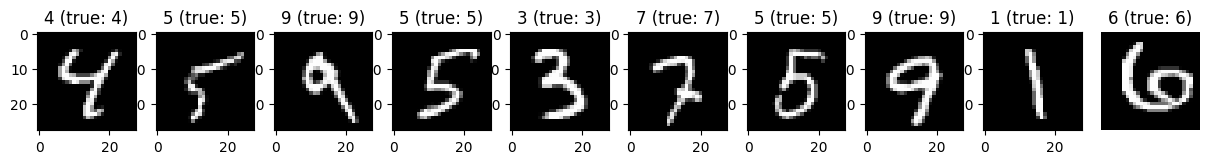

In [83]:
test_images, test_labels = next(iter(test_loader))
model.eval()

all_preds = []
with torch.no_grad():
 for X in test_images:
  preds = model(X)
  _, pred_labels = torch.max(preds, 1)
  all_preds.extend(pred_labels.numpy())

visualize_predictions(test_images, test_labels.numpy(), all_preds)

# 3. Задание
## 3.1. Обработка фотографии рукописного символа
## 3.1.1. Изобразите произвольный рукописный цифровой символ и сделайте фото.
## 3.1.2. Примените обученную модель к цифровой версии полученного фото.
## 3.1.3. Продемонстрируйте распознавание символа обученной нейронной сетью.
## 3.1.4. Оцените вероятности принадлежности фрагмента к тому или иному классу

In [84]:
def readImage(path):
  img = cv2.imread(path, cv2.IMREAD_COLOR)
  grb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  stretch_near = cv2.resize(grb, (28, 28), interpolation = cv2.INTER_LINEAR)
  stretch_near_not = cv2.bitwise_not(stretch_near)
  transform = transforms.Compose([transforms.ToTensor()])
  return  transform(stretch_near_not)

[5, 8, 1, 5]


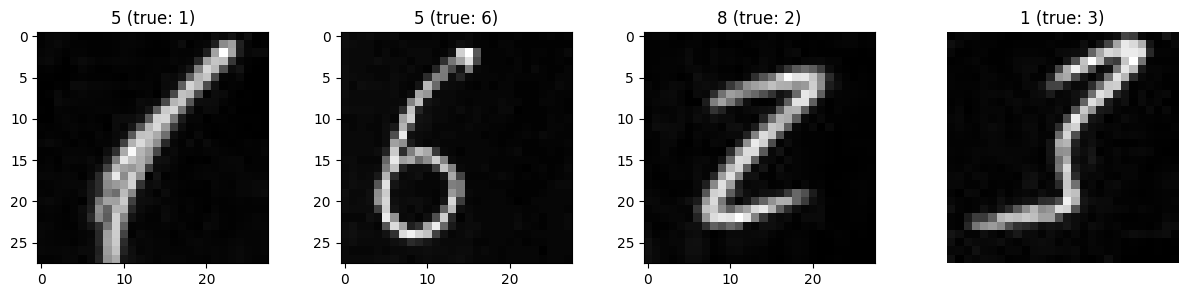

In [85]:
test_images = [readImage('./data/1.jpg'), readImage('./data/2.jpg'), readImage('./data/3.jpg'), readImage('./data/6.jpg')]
test_labels = [1, 2, 3, 6]

model.eval()

all_preds = []
with torch.no_grad():
 for X in test_images:
  preds = model(X)
  _, pred_labels = torch.max(preds, 1)
  all_preds.extend(pred_labels.numpy())

print(all_preds)

visualize_predictions(test_images, np.array(test_labels), all_preds, 4)